In [14]:
import spekpy as sp
import matplotlib.pyplot as plt # Import pyplot for plotting

In [3]:
r = sp.Spek(kvp=80,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
r.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = r.get_hvl1() # Get the 1st half-value layer in mm Al

print(hvl) # Print out the HVL value

3.54600631043076


In [5]:
t = sp.Spek(kvp=50,trans=True,thick=10,targ='Cu') # Target thickness entered in um
t.filter('Be', 250e-3) # Filter thickness entered in mm i.e. 250 um of Al; 

phi = t.get_flu() # Get the total integrated fluence

print(phi) # Print out the fluence

482129925.4764237


In [27]:
# 2. Generate a spectrum based on TRM specifications
s = sp.Spek (kvp=120, th=10.5, z=62.56) #z - расстояние до детектора
# 3. Define and apply the tube filtration specified in TRM
tube_filtration = 3.9
s.filter('Al',tube_filtration)
# 4. Define and apply the "Large" collimator filter specified in TRM
collimator_filtration = [('C',1.94), ('Al',0.19), ('Cu',0.07)]
s.multi_filter(collimator_filtration)
# 5. Make an adjustment (in mm Al) to match the Half Value Layer stated in TRM 
extra_filtration = s.get_matl (matl='Al',hvl=7.6) #фильтруем дополнительно, чтобы HVL был равен такому то значению алюминия.
s.filter('Al', extra_filtration)
# 6. Define the reference CTDI (free, air) from the TRM (mGy/400 mAs)
CTDI_ref= 75.81 # Какая-то среда после фильтров из мануала
# 7. Calculate the air kerma (uGy) and convert to mGy/400 mAs 
k120 = s.get_kerma (mas=400) * 1e-3
# 8. Calculate air kerma to CTDI conversion factor
conversion_factor = CTDI_ref /k120
# 9. Loop through tube potentials; calculate and print predictions
for pot in [70, 80, 100, 120,140]:
    s.set(kvp=pot)
    CTDI = conversion_factor * s.get_kerma(mas=400) * 1e-3
    hvl=s.get_hvl1()
    print (pot, "kV", hvl, "mm Al", CTDI, "mGy/400 mAs")

70 kV 4.706856269897396 mm Al 18.07994435188672 mGy/400 mAs
80 kV 5.3769028517381035 mm Al 26.73871329530921 mGy/400 mAs
100 kV 6.580543769751199 mm Al 48.68984561893774 mGy/400 mAs
120 kV 7.600000026323783 mm Al 75.81000000002297 mGy/400 mAs
140 kV 8.490523606602405 mm Al 107.25446003349018 mGy/400 mAs



Running demo script (1 mAs, 100 cm)

HVL1:  5.5 mm Al
HVL2: 7.19 mm Al
Kair:  57.48 uGy
Fluence: 1.502284e+08 cm-2


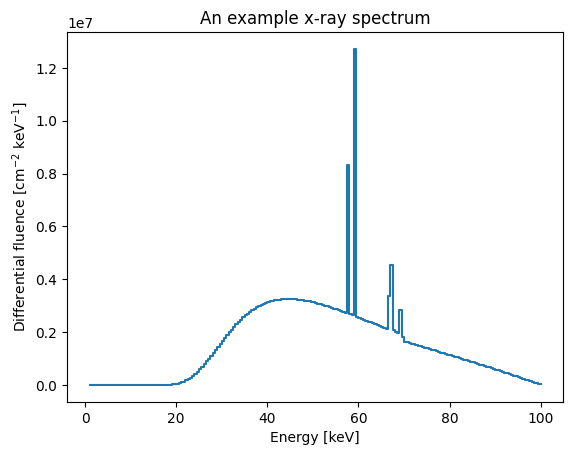


finished!



In [25]:
print('\nRunning demo script (1 mAs, 100 cm)\n')

## Generate spectrum for 100 kV potential, 10 deg. anode angle & 6 mm Al filtr.
s=sp.Spek (kvp=100, th=10) # Create the spectrum model
s.filter('Al',6.) # Add the filtration [mm]
k, phi_k= s.get_spectrum (edges=True) # Get arrays of energy & fluence spectrum

## Calculate metrics (1 mAs, 100 cm source-to-detector distance)
hvl1=s.get_hvl1() # Get 1st HVL
hvl2=s.get_hvl2() # Get 2nd HVL
kair=s.get_kerma() # Get air kerma
phi=s.get_flu() # Get total fluence

## Print metrics to screen
print('HVL1: ',round (hvl1,2), 'mm Al')
print('HVL2:', round (hvl2, 2), 'mm Al')
print('Kair: ',round (kair, 2), 'uGy')
print('Fluence:', "{:e}".format (phi), 'cm-2')

## Plot the x-ray spectrum                                                                                                                           
plt.plot(k, phi_k)
plt.xlabel('Energy [keV]')
plt.ylabel('Differential fluence [cm$^{-2}$ keV$^{-1}$]')
plt.title('An example x-ray spectrum')
plt.show()

print('\nfinished!\n')

<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:43: SyntaxWarning: invalid escape sequence '\c'
<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:43: SyntaxWarning: invalid escape sequence '\c'
C:\Users\lkond\AppData\Local\Temp\ipykernel_8236\1658605036.py:42: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(x,phi1,'0.0',label="Anode angle: 12$^\circ$")
C:\Users\lkond\AppData\Local\Temp\ipykernel_8236\1658605036.py:43: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(x,phi2,'0.5',label="Anode angle: 24$^\circ$")


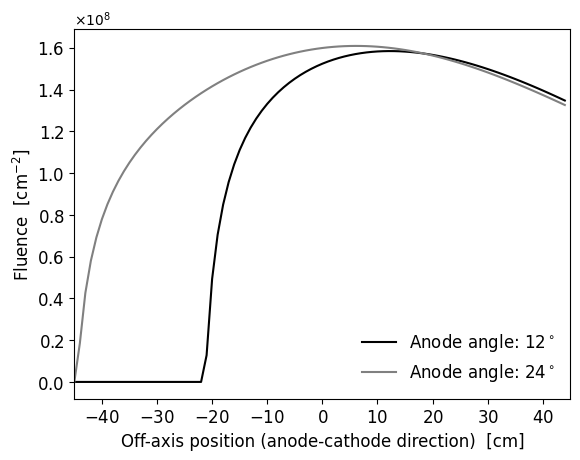

In [1]:
import spekpy as sp # Import the SpekPy library for spectral calculations
import matplotlib.pyplot as plt # Import pyplot for plotting
from numpy import rad2deg, arctan, zeros, arange # Import stuff from numpy

## Set parameters
t = 2.5 # Thickness of aluminium filtration [mm] <-- try changing this
pot = 80. # Tube potential for spectra [kV]
th1 = 12. # Low anode angle [deg.]
th2 = 24. # High anode angle [deg.]

## Generate two spectra at different anode angles
# Low anode angle spectrum
s1=sp.Spek(kvp=pot,th=th1) # Create spectrum
s1.filter('Al',t) # Apply filtration
# High anode angle spectrum
s2=sp.Spek(kvp=pot,th=th2) # Create spectrum
s2.filter('Al',t) # Apply filtration

## Generate fluence profiles (anode-cathode direction)
z = 100. # Source-to-detector distance (default SpekPy value) [cm]
x=arange(-45.,45.,1.) # Array of x-axis positions (anode-cathode dir.) [cm]
phi1=zeros(x.shape) # Preallocate arrays for low angle spectrum
phi2=zeros(x.shape) # Preallocate arrays for high angle spectrum

for i in range(x.size): # Loop through all x positions
  # if-statement to check whether the x-rays can escape the anode
  if rad2deg(arctan(x[i]/z)) > -th1: 
    s1.set(x=x[i]) # If the x-ray can escape the anode, set the x value
    phi1[i]=s1.get_flu() # And get the total integrated fluence at x
  else:
    phi1[i]=0. # If cannot escape the anode, set fluence to zero   
  # if-statement to check whether the x-rays can escape anode
  if rad2deg(arctan(x[i]/z)) > -th2:
    s2.set(x=x[i]) # If the x-ray can escape the anode, set the x value
    phi2[i]=s2.get_flu() # And get the total integrated fluence at x
  else:
    phi2[i]=0. # If cannot escape the anode, set fluence to zero

## Plot the spectra 
fig1, (ax1) = plt.subplots(nrows=1,ncols=1)
ax1.ticklabel_format(useMathText=True)
ax1.plot(x,phi1,'0.0',label="Anode angle: 12$^\circ$")
ax1.plot(x,phi2,'0.5',label="Anode angle: 24$^\circ$")
ax1.legend(frameon=False,fontsize=12,loc='lower right')
ax1.set_xlabel('Off-axis position (anode-cathode direction)  [cm]',fontsize=12)
ax1.set_ylabel('Fluence  [cm$^{-2}$]',fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlim((-45.,45.))

## Show plots on screen
plt.show()